## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
!pip install keras

In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [2]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




NameError: name 'VGG16' is not defined

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
# fit the
model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\jabez\AppData\Local\Temp\ipykernel_34800\3314549357.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
163/163 [==============================] - 599s 4s/step - loss: 0.2056 - accuracy: 0.9214 - val_loss: 0.4230 - val_accuracy: 0.8494
Epoch 2/5
163/163 [==============================] - 594s 4s/step - loss: 0.1047 - accuracy: 0.9605 - val_loss: 0.2161 - val_accuracy: 0.9215
Epoch 3/5
163/163 [==============================] - 672s 4s/step - loss: 0.0977 - accuracy: 0.9594 - val_loss: 0.3446 - val_accuracy: 0.9022
Epoch 4/5
163/163 [==============================] - 693s 4s/step - loss: 0.0912 - accuracy: 0.9655 - val_loss: 0.3398 - val_accuracy: 0.8990
Epoch 5/5
163/163 [==============================] - 652s 4s/step - loss: 0.0883 - accuracy: 0.9670 - val_loss: 0.2876 - val_accuracy: 0.9119


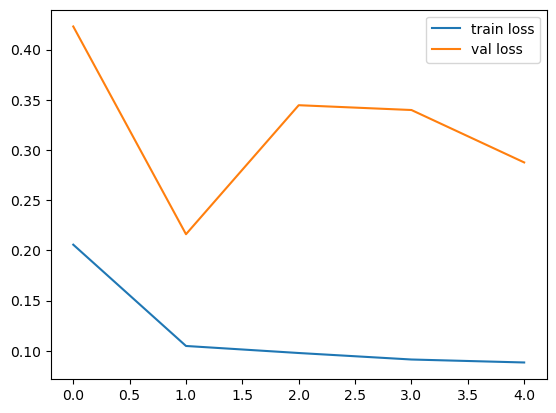

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

Input image shape: (1, 224, 224, 3)


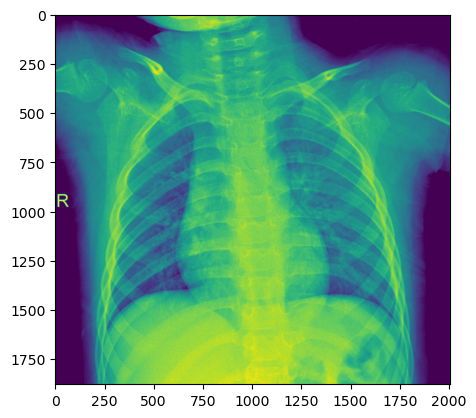

In [30]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = 'test12345.jpeg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [31]:
print(model.predict(x))

1/1 [==============================] - 0s 113ms/step
[[0. 1.]]
